In [69]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [70]:
# Load the CSV file into a pandas DataFrame
data = pd.read_csv("Mall_Customers.csv")

In [71]:
# SQL Integration Using SQLite3
# We connected the Mall Customers dataset to SQLite and ran queries to extract customer insights

import sqlite3
conn = sqlite3.connect("mall_customers.db")

In [72]:
# Save DataFrame to a SQL table named 'customers'
data.to_sql("customers", conn, index=False, if_exists="replace")

200

In [73]:
# first 5 rows
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [74]:
# Number of rows and columns
data.shape

(200, 5)

In [75]:
# Information of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [76]:
# Check missing values
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [77]:
def Age_Group(Age):
    if Age < 18:
        return 'Teen'
    elif Age < 40:
        return 'Young'
    elif Age < 60:
        return 'Adult'
    else:
        return 'Senior'

data['Age_Group'] = data['Age'].apply(Age_Group)

In [78]:
def Income_Category(Annual_Income):
    if Annual_Income < 30:
        return 'Low'
    elif Annual_Income < 60:
        return 'Medium'
    else:
        return 'High'
data['Income_Category'] = data['Annual Income (k$)'].apply(Income_Category)

In [79]:
def spending_type(score):
    if score < 40:
        return 'Saver'
    elif score < 70:
        return 'Average'
    else:
        return 'Spender'

data['Spending_Type'] = data['Spending Score (1-100)'].apply(spending_type)


In [80]:
# Choose the Annual Income Column & Spending Score column
X = data.iloc[:,[3,4]].values

print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [81]:
# Choose the number of clusters

In [82]:
# Ignore FutureWarning about n_init
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Ignore UserWarning about the memory leak
warnings.filterwarnings("ignore", category=UserWarning)

In [83]:
# find wcss value for different number of clusters
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

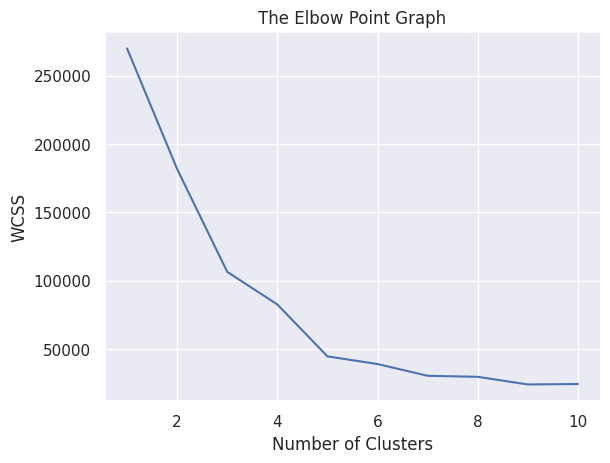

In [84]:
# Plot graph
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [85]:
# Optimum Number of Clusters = 5

In [86]:
# Traine k-Means Clustering Model
model = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = model.fit_predict(X)

data["label"] = Y

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_Group,Income_Category,Spending_Type,label
0,1,Male,19,15,39,Young,Low,Saver,3
1,2,Male,21,15,81,Young,Low,Spender,4
2,3,Female,20,16,6,Young,Low,Saver,3
3,4,Female,23,16,77,Young,Low,Spender,4
4,5,Female,31,17,40,Young,Low,Average,3


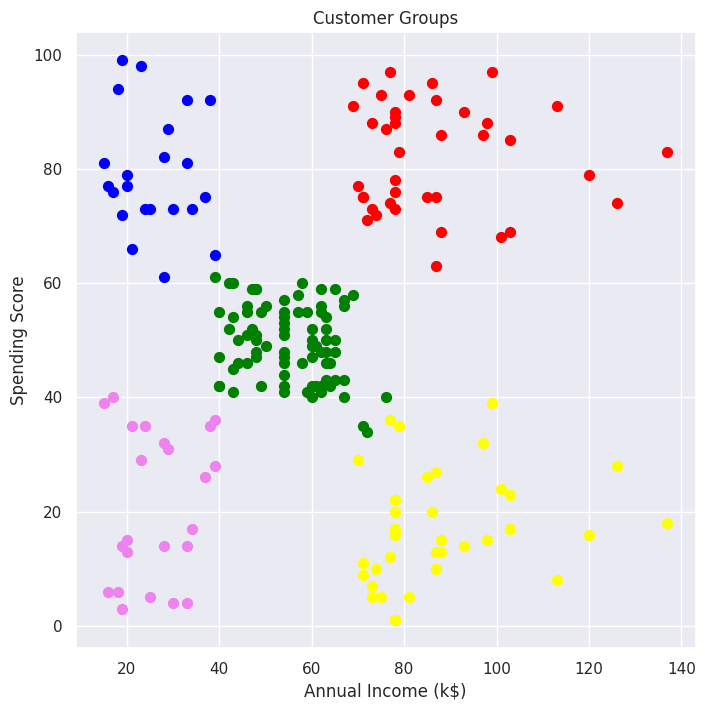

In [87]:
# Visualizing all the Clusters
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

plt.title('Customer Groups')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()

In [88]:
num_col = data.select_dtypes(include=['float64','int64'])
num = num_col.corr()

<Axes: >

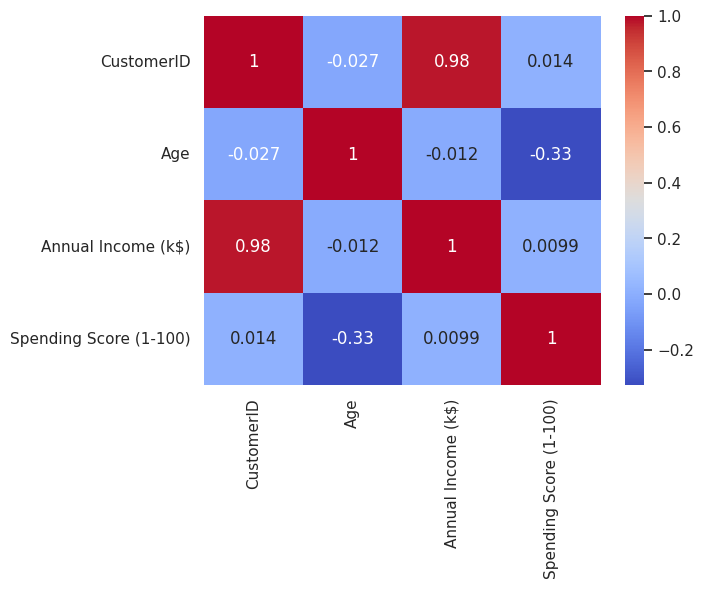

In [89]:
sns.heatmap(num, annot=True, cmap='coolwarm')

In [90]:
#Count of customers by Gender
query1 = "SELECT Gender, COUNT(*) AS total_customers FROM customers GROUP BY Gender"
result1 = pd.read_sql_query(query1, conn)
print(result1)


   Gender  total_customers
0  Female              112
1    Male               88


In [91]:
#Customers with high income and spending
query2 = """
SELECT *
FROM customers
WHERE [Annual Income (k$)] > 70 AND [Spending Score (1-100)] > 70
"""
result2 = pd.read_sql_query(query2, conn)
print(result2)


    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0          128    Male   40                  71                      95
1          130    Male   38                  71                      75
2          132    Male   39                  71                      75
3          134  Female   31                  72                      71
4          136  Female   29                  73                      88
5          138    Male   32                  73                      73
6          140  Female   35                  74                      72
7          142    Male   32                  75                      93
8          144  Female   32                  76                      87
9          146    Male   28                  77                      97
10         148  Female   32                  77                      74
11         150    Male   34                  78                      90
12         152    Male   39                  78                 

<Axes: xlabel='Age_Group', ylabel='count'>

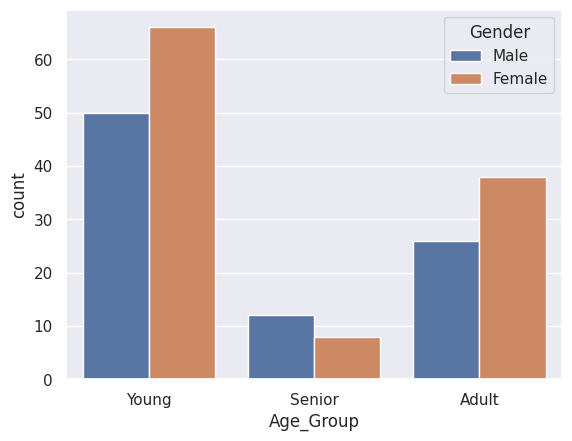

In [92]:
sns.countplot(data=data, x='Age_Group', hue='Gender')

In [97]:
# close DB
conn.close()

In [98]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_Group,Income_Category,Spending_Type,label
0,1,Male,19,15,39,Young,Low,Saver,3
1,2,Male,21,15,81,Young,Low,Spender,4
2,3,Female,20,16,6,Young,Low,Saver,3
3,4,Female,23,16,77,Young,Low,Spender,4
4,5,Female,31,17,40,Young,Low,Average,3
...,...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,Young,High,Spender,1
196,197,Female,45,126,28,Adult,High,Saver,2
197,198,Male,32,126,74,Young,High,Spender,1
198,199,Male,32,137,18,Young,High,Saver,2
